In [135]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import sys

In [136]:
img_rgb = cv2.imread('Images/Q1/text.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img2 = img_gray.copy()
method = cv2.TM_SQDIFF_NORMED

Images/Q1/Fonts/Ariel.jpg
Images/Q1/Fonts/PlatinoLinotype.jpg
[0.0006506171775981784, (149, 391)]
0.000650617177598


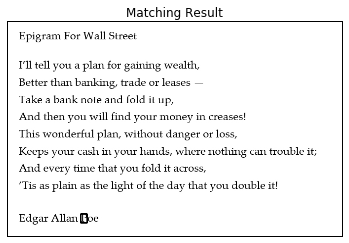

In [70]:
font_path = 'Images/Q1/Fonts'

results = []
lowest = -1

for filename in glob.glob(os.path.join(font_path, '*.jpg')): 
    img = img2.copy()
    template = cv2.imread(filename, 0)
    w, h = template.shape[::-1]
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    results.append([min_val, min_loc])
    
    if min_val < results[lowest][0] or lowest == -1:
        lowest = len(results)-1
        print filename

print results[lowest]
print results[lowest][0]

top_left = results[lowest][1]
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img, top_left, bottom_right, (0,0,255), 2)

plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(111),plt.imshow(img,cmap = 'gray')

plt.show()

Images/Q1/Sizes/10.jpg
Images/Q1/Sizes/11.jpg
Images/Q1/Sizes/14.jpg
[1.3739856967731612e-06, (23, 391)]
1.37398569677e-06


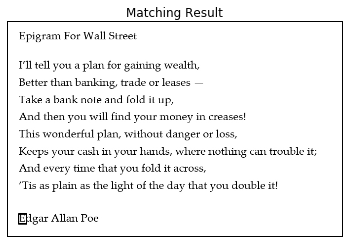

[[0.13973143696784973, (27, 152)], [0.13715550303459167, (34, 325)], [0.15550237894058228, (34, 325)], [1.3739856967731612e-06, (23, 391)], [0.17505314946174622, (267, 253)]]


In [71]:
size_path = 'Images/Q1/Sizes'

results = []
lowest = -1

for filename in glob.glob(os.path.join(size_path, '*.jpg')): 
    img = img2.copy()
    template = cv2.imread(filename, 0)
    w, h = template.shape[::-1]
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    results.append([min_val, min_loc])
    
    if min_val < results[lowest][0] or lowest == -1:
        lowest = len(results)-1
        print filename
print results[lowest]
print results[lowest][0]

top_left = results[lowest][1]
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img, top_left, bottom_right, (0,0,255), 2)

plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(111),plt.imshow(img,cmap = 'gray')

plt.show()
print results

In [137]:
temp_path = 'Images/Q1/templates'

colors = [(0,0,255), (255,0,0), (0,255,0), (0,0,0)]
start = 0
threshs = [0.06, 0.02, 0.085, 0.02]

for filename in glob.glob(os.path.join(temp_path, '*.png')): 
    print filename
    print colors[start]
    template = cv2.imread(filename, 0)
    w, h = template.shape[::-1]
    
    res = cv2.matchTemplate(img,template,method)
    threshold = threshs[start]
    
    loc = np.where(res <= threshold)
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), colors[start], 2)
    start+=1

cv2.imwrite('res.png',img_rgb)

Images/Q1/templates/a_lower.png
(0, 0, 255)
Images/Q1/templates/a_upper.png
(255, 0, 0)
Images/Q1/templates/t_lower.png
(0, 255, 0)
Images/Q1/templates/t_upper.png
(0, 0, 0)


True